In [1]:
import random
import numpy as np
from dataclasses import dataclass

@dataclass
class Conf:
    start: float
    end: float
    interval: float
    half_curve: bool = False

def get_exponential_weights(size: int, start: int = 0.2, end: int = 1.5, half_cure: bool = False) -> list[float]:
    def get_exponential_curve(start, end, size):
        x = np.linspace(start, end, size)
        y = 1 - np.exp(-x)
        return list(y)
    if half_cure is False:
        curve = get_exponential_curve(start, end, int(size/2))
        if size%2 == 0: return curve+curve[::-1]
        else: return curve+[curve[-1]]+curve[::-1]
    else:
        curve = get_exponential_curve(start, end, size)
        return curve

def generate_cell(values: list, half_curve: bool = False):
    return random.choices(
        population=values,
        weights=get_exponential_weights(len(values), half_cure=half_curve)
    )[0]

def generate_row(params: list[Conf | list | str | int]):
    row = list()
    for conf in params:
        if type(conf) == Conf:
            range = np.arange(conf.start, conf.end+1, conf.interval).round(2).tolist()
            cell = generate_cell(range, half_curve=conf.half_curve)
            row.append(cell)
        elif type(conf) == list:
            cell = generate_cell(conf)
            row.append(cell)
        elif type(conf) == int or type(conf) == str: row.append(conf)
        else: raise Exception(f'Unknown param type for: {conf}')
    return row

def draw_weights_graph(weights: list):
    import matplotlib.pyplot as plt
    x = range(len(weights))
    y = weights

    plt.plot(x, y, linestyle='--', marker='o')
    plt.title('Weightage Style')
    plt.show()

In [2]:
'''
This demonstrates how the weightage is distributed. We are creating 1000 cells and 
the values 4 and 3 are populated around 250 times and the values 2 and 5 are populated 
around 180 times and the remaining values 1 and 6 are populated around 60 times.
'''

import collections
collections.Counter([generate_cell([1, 2, 3, 4, 5, 6]) for _ in range(1000)])

Counter({4: 272, 2: 170, 3: 258, 5: 201, 1: 55, 6: 44})

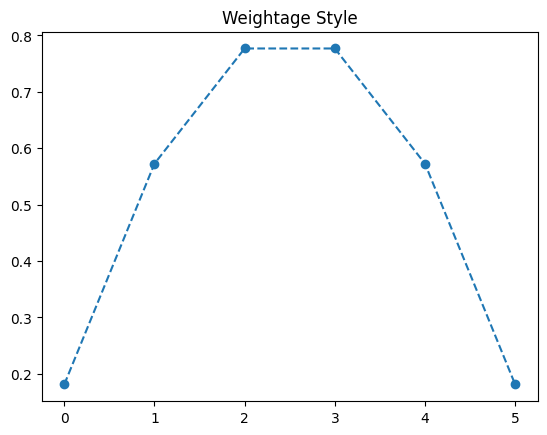

In [3]:
'''
The below graph shows the weightage applied to the numbers. 
The curve can be tuned by modifying the "get_exponential_weights" method's parameters.
'''

draw_weights_graph(get_exponential_weights(6))

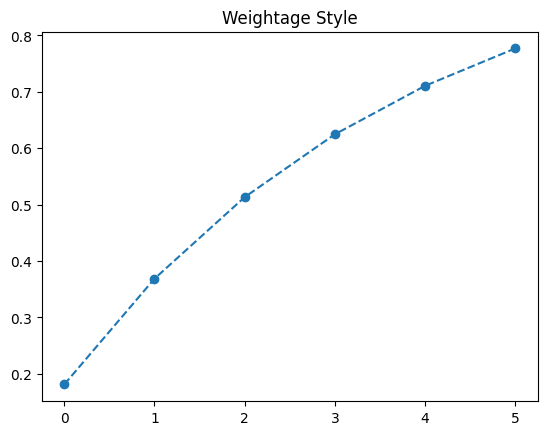

In [4]:
'''
Also a half curve weightage can be created using the following.
'''

draw_weights_graph(get_exponential_weights(6, half_cure=True))

In [30]:
'''
Lets now create a row with this concept. Here we can either pass a 
config parameter of type Conf(start, end, interval) or list of needed values or a string or int.

This creates 10 rows of data for dead people
'''

#                         Oxygen          Temperature       Heart Rate     A/D

dead = [generate_row([Conf(40, 70, 1), Conf(99, 106, 0.1), Conf(140,200,1), 'dead']) for _ in range(10)]
'''
                          /     |    \
                         /      |     \
                        /       |      \
                    start      end      interval
                    value      value
'''
dead

[[42, 102.7, 183, 'dead'],
 [51, 104.0, 177, 'dead'],
 [52, 104.7, 187, 'dead'],
 [44, 102.2, 173, 'dead'],
 [65, 104.2, 179, 'dead'],
 [57, 105.2, 192, 'dead'],
 [64, 101.7, 186, 'dead'],
 [43, 101.4, 156, 'dead'],
 [55, 100.8, 148, 'dead'],
 [61, 104.1, 191, 'dead']]

In [31]:
'''
And then for people alive
'''
#                              Oxygen            Temperature       Heart Rate          A/D

alive = [generate_row([Conf(94, 100, 1, True), Conf(97, 98.5, 0.1), Conf(80, 100, 1), 'alive']) for _ in range(10)]
alive

[[98, 98.7, 84, 'alive'],
 [98, 98.8, 83, 'alive'],
 [98, 97.3, 91, 'alive'],
 [100, 97.5, 82, 'alive'],
 [98, 98.3, 91, 'alive'],
 [97, 97.4, 92, 'alive'],
 [100, 97.5, 94, 'alive'],
 [95, 98.5, 94, 'alive'],
 [96, 99.0, 94, 'alive'],
 [100, 97.4, 84, 'alive']]

In [33]:
'''
Lets generate some noise.
'''
#                              Oxygen            Temperature          Heart Rate          A/D

noise = [generate_row([Conf(60, 100, 1, True), Conf(97, 106, 0.1,), Conf(80, 200, 1,), ['alive', 'dead']]) for _ in range(3)]
'''
                                                                                                 ^
                                                                                                 |
                                                                                            This or that
'''
noise

[[91, 102.0, 114, 'dead'], [87, 97.1, 106, 'alive'], [88, 102.2, 159, 'dead']]

In [34]:
'''
Now we combine all of it and shuffle.
'''

combined = dead + alive + noise
random.shuffle(combined)
combined

[[100, 97.5, 82, 'alive'],
 [61, 104.1, 191, 'dead'],
 [98, 98.3, 91, 'alive'],
 [65, 104.2, 179, 'dead'],
 [52, 104.7, 187, 'dead'],
 [95, 98.5, 94, 'alive'],
 [43, 101.4, 156, 'dead'],
 [100, 97.4, 84, 'alive'],
 [64, 101.7, 186, 'dead'],
 [55, 100.8, 148, 'dead'],
 [44, 102.2, 173, 'dead'],
 [96, 99.0, 94, 'alive'],
 [87, 97.1, 106, 'alive'],
 [97, 97.4, 92, 'alive'],
 [100, 97.5, 94, 'alive'],
 [98, 98.8, 83, 'alive'],
 [57, 105.2, 192, 'dead'],
 [91, 102.0, 114, 'dead'],
 [88, 102.2, 159, 'dead'],
 [42, 102.7, 183, 'dead'],
 [98, 98.7, 84, 'alive'],
 [51, 104.0, 177, 'dead'],
 [98, 97.3, 91, 'alive']]